# <font color='blue'>Examen Primera Sesión: Modelado y simulación de sistemas</font>

# 1. Campaña publicadad para el Kefir

El kefir es un producto lácteo parecido al yogur líquido, fermentado a través de la acción de un conjunto de levaduras (hongos) y lactobacilos (bacterias). Es un producto que facilita la digestión, fortalece el sistema inmunológico al mantener la flora intestinal sana, combate la inflamación intestinal, previene y combate la gastritis, especialmente la causada por Helicobacter pylori, favorece la reducción de peso, etc. Lamentablemente no es muy conocido en nuestro medio por lo que tu empresa decide realizar una campaña de publicidad en una población de un millon de clientes potenciales. La velocidad a la que la población conoce los beneficios del kefir es proporcional a la población que aún no sabe del producto. En un año, la mitad de la población es conciente de los beneficios del kefir, dando una constante de crecimiento igual a $k=0.69$. Modelar y simular el el sistema, de tal manera que podamos responder:

1. Aproximadamente que población se enterará del kefir luego de 2 años?
2. En cuanto tiempo el 90% de la población se entrará del Kefir?

In [6]:
import math

# Constante de crecimiento
k = 0.69

# 1. Calcular la fracción de la población después de 2 años
p_2_years = 1 - math.exp(-k * 2)
print(f"1. Después de 2 años, aproximadamente el {p_2_years * 100:.2f}% de la población se enterará del kéfir.")

# 2. Calcular el tiempo necesario para que el 90% de la población se entere del kéfir
t_90_percent = -math.log(1 - 0.9) / k
print(f"2. Se necesitarán aproximadamente {t_90_percent:.2f} años para que el 90% de la población se entere del kéfir.")


1. Después de 2 años, aproximadamente el 74.84% de la población se enterará del kéfir.
2. Se necesitarán aproximadamente 3.34 años para que el 90% de la población se entere del kéfir.


# 2. Campaña evaluación de automoviles para detección de producción de $CO_2$

La contaminación es una preocupación en todo el mundo. Es preciso identificar automoviles que puedan tener una gran cantidad de producción de CO2. Dada una data, se quiere predecir la cantidad de CO2 que puede llegar a producir un automovil. 

Realiza el entrenamiento con una variable (la mas relevante), con dos variables, y con tres variables. 

Para cada una de ellas, 

1. Visualizar datos (1, 2 variables)
2. Dividir en datos para prueba, datos para entrenamiento.
3. Cual de los tres modelos tiene mayor confiabilidad? (sugerencia utilizar r2 para sustentar la elección)

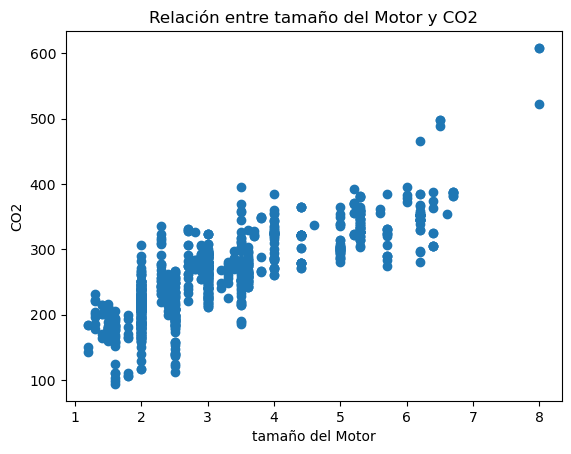

R2 Score (Modelo 1): 0.6820075195225397


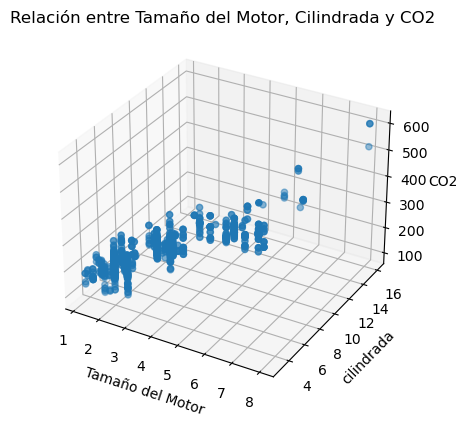

R2 Score (Modelo 2): 0.6953155708999226
R2 Score (Modelo 3): 1.0


In [4]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Cargar tus datos (reemplaza 'tu_data.csv' con el nombre de tu archivo CSV)
data = pd.read_csv('contamina.csv')

# Escenario 1: Una variable
# Seleccionar la variable más relevante (por ejemplo, tamaño del motor)
X1 = data[['tam_motor']]
y = data['emision_CO2']

# Visualizar datos (scatter plot)
plt.scatter(X1, y)
plt.xlabel('tamaño del Motor')
plt.ylabel('CO2')
plt.title('Relación entre tamaño del Motor y CO2')
plt.show()

# Dividir en datos de entrenamiento y prueba
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Entrenar modelo
model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Predecir en datos de prueba
y_pred1 = model1.predict(X1_test)

# Evaluar el modelo
r2_1 = r2_score(y_test, y_pred1)
print(f'R2 Score (Modelo 1): {r2_1}')

# Escenario 2: Dos variables
# Seleccionar dos variables (por ejemplo, potencia del motor y peso)
X2 = data[['tam_motor', 'cilindrada']]

# Visualizar datos (scatter plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2['tam_motor'], X2['cilindrada'], y)
ax.set_xlabel('Tamaño del Motor')
ax.set_ylabel('cilindrada')
ax.set_zlabel('CO2')
plt.title('Relación entre Tamaño del Motor, Cilindrada y CO2')
plt.show()

# Dividir en datos de entrenamiento y prueba
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Entrenar modelo
model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Predecir en datos de prueba
y_pred2 = model2.predict(X2_test)

# Evaluar el modelo
r2_2 = r2_score(y_test, y_pred2)
print(f'R2 Score (Modelo 2): {r2_2}')

# Escenario 3: Tres variables
# Seleccionar tres variables (por ejemplo, tam del motor, cilindros y consumo)
X3 = data[['tam_motor', 'cilindrada', 'emision_CO2']]

# Dividir en datos de entrenamiento y prueba
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Entrenar modelo
model3 = LinearRegression()
model3.fit(X3_train, y_train)

# Predecir en datos de prueba
y_pred3 = model3.predict(X3_test)

# Evaluar el modelo
r2_3 = r2_score(y_test, y_pred3)
print(f'R2 Score (Modelo 3): {r2_3}')


# 3. Revisando la calidad de la crema de Copoazu.

Se tiene una data que tiene información de una materia prima (copoazu) para predecir la calidad de una crema que se esta produciendo. Basado en dos de sus características se establecen 3 categorias, 0, 1, 2. 

Se pide 

1. Cargar la data y visualizar cada clase (colores diferentes).
2. Entrenar un modelo logistico
3. Mostrar en la grafica la frontera de decisión (verificar sobre ajuste).
4. Computar matriz de confusión. 

   car0  car1  car3
0  1.84  4.61   3.0
1  5.66  4.80   2.0
2  6.35  3.29   2.0
3  2.90  4.61   3.0
4  3.23  4.94   3.0


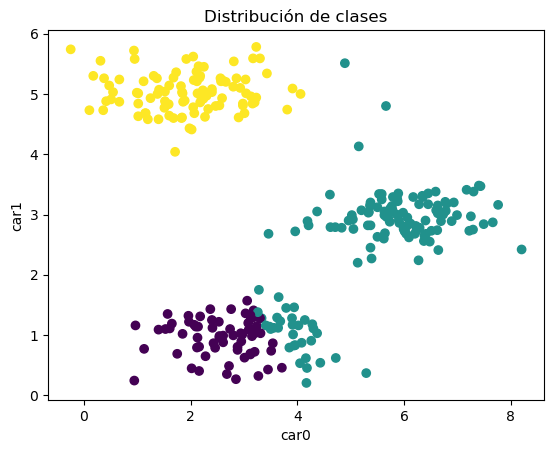

/Users/gabriel1chiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


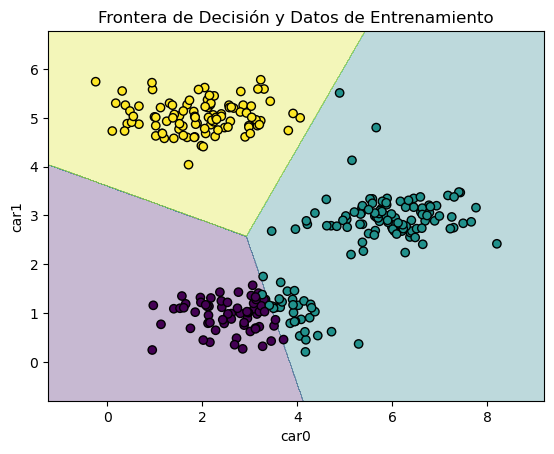

Matriz de Confusión:
[[12  0  0]
 [ 0 26  0]
 [ 0  0 22]]


/Users/gabriel1chiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


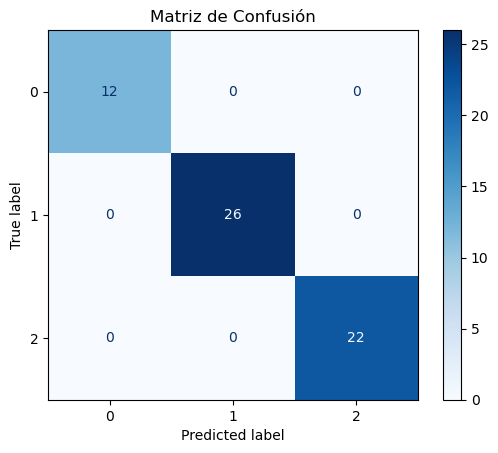

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Cargar los datos desde el archivo CSV
data = pd.read_csv('calidad.csv')

# Visualizar las primeras filas del DataFrame
print(data.head())

# Visualizar las clases
plt.scatter(data['car0'], data['car1'], c=data['car3'], cmap='viridis')
plt.xlabel('car0')
plt.ylabel('car1')
plt.title('Distribución de clases')
plt.show()

# Dividir los datos en características (X) y etiquetas (y)
X = data[['car0', 'car1']]
y = data['car3']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo logístico
model = LogisticRegression()
model.fit(X_train, y_train)

# Mostrar la frontera de decisión
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X['car0'], X['car1'], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('car0')
plt.ylabel('car1')
plt.title('Frontera de Decisión y Datos de Entrenamiento')
plt.show()

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print('Matriz de Confusión:')
print(conf_matrix)

# Mostrar la matriz de confusión en un gráfico
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', display_labels=['0', '1', '2'])
plt.title('Matriz de Confusión')
plt.show()


# 4. Distribución de productos en el supermercado

Se tiene una data, que contiene información sobre los montos de gasto anual de varios clientes de diversas categorías de productos.
Se desea un modelo para agrupar los datos tl que podamos ver los productos que son comprados juntos por los clientes. Por ejemplo, si una persona va a la tienda a comprar algúna "masita", es muy probable que también compre “leche”, por lo tanto podemos colocar la “leche” cerca de llas masitas en la tienda; de la misma manera es muy poco probable que la misma persona compre las verduras frescas al mismo tiempo. Si podemos predecir este comportamiento del cliente, podemos organizar la tienda, en consecuencia aumentará las ventas de artículos. La primera columna corresponde a Tipo y se refiere al canal de clientes que vendría siendo hoteles, restaurantes o cafetería o canal de venta al por menor. La segunda columna se refiere a la de “Region” o Región de venta, que sería cochabamba, La Paz u otra.

A partir de la tercera columna podemos encontrar la información que realmente nos interesa, que serían los productos que se venden.


* Determinar el número de centroides (grupos) a implementar
* Generar el modelo de agrupamiento
* Describir los grupos.




In [9]:
import pandas as pd

# Carga de datos
data = pd.read_csv('productos.csv')

# Visualización de las primeras filas del DataFrame
print(data.head())


   Tipo  region  frescos  lacteos  abarrotes  congelados  detergentes  \
0     2       3    12669     9656       7561         214         2674   
1     2       3     7057     9810       9568        1762         3293   
2     2       3     6353     8808       7684        2405         3516   
3     1       3    13265     1196       4221        6404          507   
4     2       3    22615     5410       7198        3915         1777   

   especiales  
0        1338  
1        1776  
2        7844  
3        1788  
4        5185  


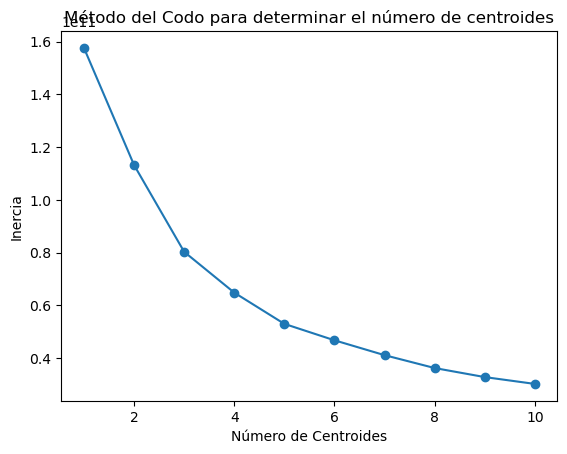

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar el rango de posibles centroides (grupos)
num_centroids = range(1, 11)
inertia = []

# Aplicar K-Means para diferentes cantidades de centroides
for k in num_centroids:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.iloc[:, 2:])  # Seleccionar las columnas relevantes
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(num_centroids, inertia, marker='o')
plt.xlabel('Número de Centroides')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número de centroides')
plt.show()


In [19]:
# Elegir el número óptimo de centroides basado en el método del codo
optimal_k = 3  # Ajustar según la interpretación del método del codo

# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(data.iloc[:, 2:])  # Seleccionar las columnas relevantes

# Agregar la columna de grupo al DataFrame original y exportar
data.to_csv('datos_supermercado_con_clusters.csv', index=False)
